<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Redes Neuronales </p> Conceptos </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="purple"> 1. Introducción redes neuronales </FONT>

En este notebook haremos un repaso de los conceptos fundamentales de las redes neuronales y exploraremos un ejemplo ilustrativo con un conjunto de datos estructurado con el fin de revisar como generar la arquitectura de la red neuronal usando el perceptron multicapa de *skilearn* y luego con la librería *keras* y *tensorflow*.

Iniciaremos indicando los conceptos fundamentales.

- Las redes neuronales artificiales o (ANN, artificial neural networks) son algoritmos de machine learning cuyo funcionamiento está inspirado en la neurona biológica y sus conexiones entre si.

- La estructura de una red neuronal tiene la siguiente forma

     - Capa de entrada
     - Capas ocultas intermedias
     - Capa de salida


<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/redes3.png?raw=true" width="700" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>


Cada una de estas capas está compuesta por nodos o neuronas que se conectan con otras y tienen asociadas pesos $w_{ij}$ y un umbral o bias $b_{ij}$.

Cuando la salida de cualquier nodo está por encima del valor de umbral determinado, ese nodo se activa y envía datos de salida a la siguiente capa de la red. En caso contrario, no se pasan datos a la siguiente capa.







## <FONT SIZE=4 COLOR="blue"> 1.1 Perceptrón </FONT>

- Algoritmo para resolver problemas de clasificación binaria, es decir, determina si pertenece a una clase o no.

- Fue inventado en 1958 por Frank Rosenblatt.

- El método puede funcionar bien si las clases son linealmente separables. En caso contrario los resultados no son los deseados y deberíamos usar perceptrón multicapa (que veremos más adelante).

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/redes4.png?raw=true" width="600" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>


Veamos un ejemplo muy intuitivo.

Suponga que queremos determinar si vamos al cine o no. Esto indica que queremos determinar la salida *si* o *no* en la red neuronal. Además, supongamos que por experiencia, para tomar la decisión de ir o no al cine se deben tres en cuenta tres elementos:

   + ¿Tengo dinero para ir al cine? **(Si: 1, NO ; 0)**
   + ¿Mi pareja quiere ir al cine? **(Si: 1, NO ; 0)**
   + ¿El clima es apropiado para salir de casa? **(Si: 1, NO ; 0)**

En la vida real no todos los elementos que nos llevan a tomar decisiones tienen la misma importancia o el mismo peso. En ese orden de ideas, supongamos que los pesos de cada una de los elementos anteriores son:

   - ¿Tengo dinero para ir al cine? **peso** $w_1=5$

   - ¿Mi pareja quiere ir al cine? **peso** $w_2=4$

   - ¿El clima es apropiado para salir de casa? **peso** $w_3=3$

Ahora bien, necesitamos una función y umbral. La función de decisión estará  dada por

$$x_1w_1+x_2w_2+x_3w_3$$

donde $x_i$ es el valor de decisión **(Si: 1, NO ; 0)** de cada elemento que lleva a tomar la decisión.

Finalmente, para tomar la decisión establecemos un umbral ( por ejemplo 8, puede ser cualquier otro valor). En otras palabras la función de salida es

$$\begin{cases} 1 & \text{si} \quad  5x_1+4x_2+3x_3 \geq 8 \\ 0 & \text{si} \quad  5x_1+4x_2+3x_3 <  8  \end{cases}$$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/redes1.png?raw=true" alt="centered image" width="500" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Por ejemplo,

⋆ Tenemos dinero para ir : $X_1 = 1$.

⋆ Mi pareja no quiere ir : $X_2 =0$.

⋆ Está haciendo clima adecuado para ir $X_3 =1$

En este caso

$$\sum \limits_{i=1}^3 X_iw_i = (5)(1)+(4)(0)+(3)(1)= 8$$

De acuerdo con el umbral, la función de salida (función de activación) nos indica que sí vamos al cine.

El ejemplo anterior es una versión muy básica e intuitiva de cómo opera una neurona.

En general, para una neurona tendremos un esquema como el siguiente:

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/redes2.png?raw=true" alt="centered image" width="550" height="270"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

## <FONT SIZE=4 COLOR="blue"> 1.2 Función de Activación </FONT>

Observe que un elemento importante que lleva a que se active o no una determinada neurona para tomar una decisión es la función de activación.

**Función de activación:** Es una función que transmite la información generada por la combinación lineal de pesos y entradas

$$a_1w_1+a_2w_2 + \dots + a_nw_n$$

Pensémoslo de la siguiente forma: si hemos definido un determinado umbral en una neurona, la función de activación al ser evaluada en la combinación lineal de pesos y entradas toma un valor que, comparado con el umbral nos determina si se activa o no la entrada siguiente, o en otras palabras, si enviamos o no la información a la siguiente capa.

Entre las funciones de activación más usadas están:


<center><FONT size=5 color="PURPLE"> Función Sigmoide </FONT></center>
<br>
$$f(x)=\dfrac{1}{1+e^{-x}}$$
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/sigmoide.png?raw=true" alt="centered image" width="450" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

<center><FONT size=5 color="magenta"> Función Tangente Hiperbólica
</FONT></center>
<br>
$$f(x)=\tanh(x)=\dfrac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/tanh.png?raw=true" alt="centered image" width="450" height="300"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

<center><FONT size=5 color="green"> Función ReLu: Rectified Lineal Unit
</FONT></center>
<br>
$$f(x)=\max(0,x)$$
<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/ReLu.png?raw=true" alt="centered image" width="500" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>

Nota: No hay una forma general de saber cuál de las anteriores funciones se debe usar. Sin embargo, dependiendo del tipo de problema se recomienda una u otra. Por ejemplo, para problemas de clasificación binaria, se recomienda la función sigmoide en las capas de salida y la función **ReLU** en capas intermedias.







## <FONT SIZE=4 COLOR="blue"> 1.3 Perceptron Multicapa </FONT>

El perceptrón multicapa se basa en la estructura del perceptrón con la diferencia que entre la capa de entrada y salida tenemos capa ocultas.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/redes5.png?raw=true" alt="centered image" width="600" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

Vamos a revisar algunos elementos fundamentales de este concepto.

El **Perceptrón Multicapa** (*Multilayer Perceptron : MLP* por sus siglas en inglés) es una Red Neuronal Artificial (ANN) que puede usarse en problemas de clasificación o regresión que no son linealmente separables.

Además, está formado por una serie de capas cada una de ellas compuestas por neuronas, donde cada neurona de una capa está conectada con todas las neuronas de la capa posterior. Las capas de una red neuronal las podemos dividir en 3 tipos que son:

  - ***Capa de entrada***: Está formada por tantas neuronas como variables tengan los elementos de entrada. Las Neuronas de la capa de entrada no realizan ningún tipo de procesamiento.

  - ***Capas ocultas***: Está compuesta por una serie de neuronas cuyas entradas provienen de las salidas de las neuronas de la capa anterior y sus salidas sirven como entrada a cada una de las neuronas de la capas posterior.

  - ***Capas de salida***: Está formada por una o más neuronas, y los valores de estas neuronas corresponden con la salida de la red.

    

## <FONT SIZE=4 COLOR="blue"> 1.4  Entrenamiento de una Red Neuronal</FONT>

Para crear y entrenar una Red Neuronal (un Perceptrón Multicapa) seguiremos los siguientes pasos:

1.***Preprocesar los datos***: reconocer los datos, sus propiedades y el análisis descriptivo para entender el problema. Adicionalmente, entre más datos tengamos mucho mejor.
<br>
2.***Determinar una función de pérdida***. También *loss function* o *función de costo* es una función que evalúa la desviación entre las predicciones realizadas por la red neuronal y los valores reales.

 - En este link [Funciones de Pérdida](https://keras.io/losses/) podemos explorar más de este concepto.

$$f_{loss} = predicción - valor\_real$$

Algunas de las funciones de pérdida más cómunes son:

 - Para problema de regresión. El ***Error cuadrático medio*** o ***MSE*** por sus siglas en inglés:

$$MSE = \dfrac{1}{n} \sum \limits_{i=1}^{n} (y_i - \hat{y_i})^2$$

    
 - Para problemas de clasificación. Tenemos ***Cross Entropy***.

$$Entropy = - \sum \limits_{i=1}^{n} y_i \log(\hat{y_i})$$

En está última, debemos tener en cuenta:

   - Clasificación binaria: ***binary crossentropy***
    
   - Clasificación multiclase: ***Categorical_crossentropy***.
<br>

3.***Definimos la arquitectura de la Red Neuronal*** y sus hiperparámetros.

- Número de capas.

- Neuronas por capa

- Funciones de activación.

- Algunos ***hiperparámetros***:

  - **Learning Rate**: parámetro del descenso del gradiente para hacer que el algoritmo converge a un punto mínimo.

  - **Epochs**: número de veces que la red neuronal aprenderá de todas las observaciones del conjunto de datos. Es decir, las pasadas o ciclos que hace la red para ajustar los pesos.

  - **Batch Size**: número de observaciones que tiene que leer la Red Neuronal antes de actualizar el modelo (pesos)

  - **Regularization Rate**

  - Entre otros. Consultar bibliografía.


**Nota**: *Por ejemplo, con un Batch Size de 100 lo que haremos será calcular la salida para 100 Observaciones y calcular sus errores en función de la predicción que realice la Red. Posteriormente se calcula el error medio de las 100 observaciones y se actualizan los pesos de la Red Neuronal*

- Un *Batch Size* pequeño:  la Red Neuronal aprende muy bien pero tardará mucho tiempo en calcular el modelo.
    
- Un *Batch Size* grande: la Red Neuronal no aprende tan bien pero tardará menos tiempo en calcular el modelo.


4.***Seleccionar un algoritmo de optimización*** para minimizar la función de pérdida para que ajuste los pesos de la red. Hay muchas opciones: ver la siguiente referencia [Optimizadores](https://keras.io/optimizers)

- Stochastic Gradient Descent (SGD)

- RMSProp

- Adam

- AdaGrad

- AdaDelta

- AdaMax



## <FONT SIZE=4 COLOR="blue"> 1.5 Otros elementos a tener en cuenta </FONT>

Cuando entrenamos una red neuronal podemos establecer algunos hiperparámetros con el fin de revisar diferentes alternativas de entrenamiento.

Existen otros elementos que podemos tener en cuenta al momento de entrenar una red neuronal:

- *Dropout*

- *Early Stopping*

### <FONT SIZE=4 COLOR="green"> 1.5.1 Dropout </FONT>

El ***Dropout***:  es un método que se utiliza para la regularización y busca reducir el overfiting.

Consiste en ***perturbar la red*** en cada pasada de entrenamiento (feed-forward y backpropagation), eliminando al azar algunas de las unidades de cada capa.

<br>
<center><img src="https://nuclio.school/wp-content/uploads/2020/08/tecnica-dropout-data-science-760x399.png" alt="centered image" width="500" height="300"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: https://www.linkedin.com/pulse/redes-neuronales-artificiales-mariano-a-hernandez  </FONT> <figcaption></center>
<br>

En otras palabras, estamos apagando algunas neuronas de manera aleatoria en cada pasada con el fin de que no se sobre entrene la red. Esto previene el *overfitting*.

### <FONT SIZE=4 COLOR="green"> 1.5.2 Early Stopping </FONT>

El ***early stopping*** o parada temprana es uno de los *callbacks* que detiene el entrenamiento si la función de pérdida no mejora su rendimiento (*score*) después de algunas iteraciones.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Redes/redes6.png?raw=true" alt="centered image" width="500" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

###<FONT SIZE=4 COLOR="green"> 1.5.3 Patience </FONT>

El ***patience*** o paciencia por su traducción al español, es la tolerancia que tendrá el modelo antes de que para. Es decir, el número de iteraciones de tolerancia para que el modelo baje la pérdida. Recordemos que se quiere minimizar la *función de pérdida* si llega a un punto donde después de un número determinado de iteraciones (la *patience*) el modelo no mejora su *score* el algoritmo hace un *stop* y detiene el entrenamiento.

# <FONT SIZE=5 COLOR="purple"> 2. Ejemplo de Clasificación con los diferentes modelos </FONT>

En este caso intentaremos predecir a qué categoría corresponde un conjunto de datos, es decir, un problema de clasificación binaria.

Usaremos tres variaciones de las redes:

- Perceptrón. Se puede aplicar en clasificación binaria.
- MLP. Perceptrón multicapa
- Configuración de Red en TensorFlow-Keras

Queremos predecir si una integrante de una muestra que representa a una población, en este caso de Indias Pima, tiene diabetes. Queremos hacer esto a partir de múltiples variables que tenemos de cada uno de los pacientes:

- ***Pregnancies***: Número de embarazos que ha tenido en su vida
- ***Glucose***: Nivel de concentración de glucosa en sangre
- ***BloodPressure***: Presión arterial
- ***SkinThikness***: Espesor de piel a la altura del triceps
- ***Insulin***: Respuesta a dosis de insulina en 2 horas
- ***BMI***: Índice de masa corporal
- ***DiabetesPedigreeFunction***: Presencia de diabetes en ascendencia directa
- ***Age***: Edad del paciente
- ***Outcome***: Variable que queremos predecir:
   - $1$ : Tiene diabetes
   - $0$ : No tiene diabetes



## <FONT SIZE=4 COLOR="blue"> 2.1 Librerías de Trabajo </FONT>

Para esta sección trabajaremos con las siguientes librerías

In [2]:
# Manipulación de data.frames
import pandas as pd
import numpy as np

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler
from sklearn.preprocessing      import LabelEncoder

# Librerías para perceptrón y ANN-multicapa con sklearn
from sklearn.linear_model       import Perceptron             # (clasificación binaria)
from sklearn.neural_network     import MLPClassifier          # (multiclase)

# Para trabajar redes con Keras.

from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import Dense
from tensorflow.keras.layers    import Dropout
#from keras.callbacks           import EarlyStopping, LearningRateScheduler

# Métricas de evaluación
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 2.2 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

In [3]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/diabetes.csv"

In [4]:
diabetes= pd.read_csv(url)

## <FONT SIZE=4 COLOR="blue"> 2.3 Exploración de los datos </FONT>

Vamos a realizar una exploración rápida de los datos

In [5]:
# los primeros datos de la tabla
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# los últimos datos de la tabla
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# el tamaño de los datos
diabetes.shape

(768, 9)

In [8]:
# la información de la variables
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# resumen estadístico
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# frecuencias de la variable objetivo
diabetes.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [11]:
px.bar(diabetes.Outcome.value_counts(),
       color = diabetes.Outcome.value_counts().index)

Se debe tener en cuenta que los datos están desbalanceados. Sin embargo, para el propósito de este ejercicio los tomaremos de esta forma.

## <FONT SIZE=4 COLOR="blue"> 2.4 Conjunto de Entrenamiento, Validación y Prueba </FONT>

En el caso de las redes neuronales se tienen que ajustar una cantidad importante de hiperparámetros. Por esta razón es importante dividir el conjunto entre conjuntos.

- **Conjunto de Entrenamiento (train):** Datos que usamos para entrenar el modelo. Permite ajustar los pesos

- **Conjunto de Validación: (validation)** Datos para ajustar hiperparámetros.

- **Conjunto de prueba (test):** Datos que se usan para evaluar el rendimiento final y generalización del modelo

Normalmente, usamos $70\%-20\%-10%$ / $60\%-20\%-20%$

Definimos las variables: objetivo y predictoras o características

In [ ]:
# la variable objetivo
y = diabetes.Outcome
# las variables predictoras
X = diabetes.drop("Outcome", axis=1)

Dividimos los datos en *train* , *validation* y *test*

In [34]:
# dividir en los tres conjuntos
# 1. Dividimos en entrenamiento (60%) y el otro (40%) lo denominamos temporal ya que se va a volver a dividir
X_train, X_temp, y_train, y_temp = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.4)          # tamaño del conjunto de prueba

X_val, X_test, y_val, y_test = train_test_split(X_temp,                       # variables predictoras
                                                y_temp,                       # variable de respuesta
                                                random_state = 0,             # semilla para que al ejecutar siempre de igual
                                                test_size = 0.5)              # tamaño del conjunto de prueba


In [35]:
print(diabetes.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(768, 9)
(460, 8)
(154, 8)
(154, 8)


In [39]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(460,)
(154,)
(154,)


## <FONT SIZE=4 COLOR="blue"> 2.5 Escalar las variables predictoras </FONT>

- En general es importante escalar las variables, ya que esto ayuda al algoritmo del descenso del gradiente en el proceso de optimización.

- Una recomendación es hacer el escalamiento después de dividir en entrenamiento y prueba. Ya que la idea es que no se sobreentrene el modelo.

In [40]:
escalar = StandardScaler()
X_train_s = escalar.fit_transform(X_train)
X_val_s = escalar.transform(X_val)
X_test_s = escalar.transform(X_test)

## <FONT SIZE=4 COLOR="magenta"> 2.6 Modelo del Perceptrón </FONT>

Usaremos el modelo de perceptrón para el problema de clasificación.

Se debe tener en cuenta que este aplica para problemas de clasificación binaria, como el de este ejercicio.

In [41]:
# Perceptrón

per_clf = Perceptron(tol=1e-5,                # criterio de parada cuando loss>loss-tol
                     random_state=0,          # semilla
                     max_iter=100,            # máximo de pases por los datos de entrenamiento (epoch)
                     alpha=0.0001             # constante de regularización
                     )

per_clf.fit(X_train_s, y_train)

# 4. Evaluación en entrenamiento
print('Perceptrón Accuracy en train:    ', accuracy_score(y_train, per_clf.predict(X_train_s)))
print('Perceptrón Recall en train:      ', recall_score(y_train, per_clf.predict(X_train_s)))
print('Perceptrón F1 en train:          ', f1_score(y_train, per_clf.predict(X_train_s)), "\n")

# 5. Evaluación en validación
print('Perceptrón Accuracy en val:      ', accuracy_score(y_val, per_clf.predict(X_val_s)))
print('Perceptrón Recall en val:        ', recall_score(y_val, per_clf.predict(X_val_s)))
print('Perceptrón F1 en val:            ', f1_score(y_val, per_clf.predict(X_val_s)), "\n")

# 6. Evaluación en prueba (test)
print('Perceptrón Accuracy en test:     ', accuracy_score(y_test, per_clf.predict(X_test_s)))
print('Perceptrón Recall en test:       ', recall_score(y_test, per_clf.predict(X_test_s)))
print('Perceptrón F1 en test:           ', f1_score(y_test, per_clf.predict(X_test_s)))


Perceptrón Accuracy en train:     0.6695652173913044
Perceptrón Recall en train:       0.7818181818181819
Perceptrón F1 en train:           0.6292682926829268 

Perceptrón Accuracy en val:       0.6298701298701299
Perceptrón Recall en val:         0.8333333333333334
Perceptrón F1 en val:             0.6122448979591837 

Perceptrón Accuracy en test:      0.6753246753246753
Perceptrón Recall en test:        0.8163265306122449
Perceptrón F1 en test:            0.6153846153846154


## <FONT SIZE=4 COLOR="magenta"> 2.7 Modelo MLP </FONT>

Usaremos el modelo de perceptrón multicapa para el problema de clasificación.

***hidden_layer_sizes***:  Se trata de una tupla conteniendo el número de neuronas en cada capa oculta:

 - $(10, )$ hace referencia a una capa oculta de 10 neuronas.

 - $(50, 20, 10)$ hace referencia a tres capas ocultas de 50, 20 y 10 neuronas artificiales respectivamente.

***activation***: Función de activación para las neuronas artificiales de las capas ocultas. En la librería **Scikit-Learn** no es posible establecer funciones de activación distintas para cada capa. Hay cuatro opciones disponibles:
  
  - **identity**:  función identidad que devuelve el mismo valor que recibe:
  $$f(x)=x$$

  - **logistic**:
  $$ f(x) = \dfrac{1}{1+e^{-x}}$$

  - **tanh**: función tangente hiperbólica:
  $$ f(x) = tanh(x)$$

  - **relu**: opción por defecto. Función "rectified linear unit":
  $$ f(x) = \max(0, x)$$

***solver***:  El parámetro solver determina el optimizador a utilizar para el cálculo del mínimo de la función de coste. Tres opciones disponibles:

 - **lbfgs**: optimizador de la familia de los métodos casi-Newton.

 - **sgd**: descenso de gradiente estocástico.

 - **adam**: opción por defecto.

**max_iter**:  El parámetro *max_iter* determina el número máximo de epochs durante las que se va a entrenar el modelo. El valor por defecto es 200. Si el modelo converge antes de este número de iteraciones, se detiene el aprendizaje.

***learning_rate***: Tasa de aprendizaje usada durante la actualización de los pesos. Se ofrecen tres opciones:

 - **constant**: valor constante especificado por el parámetro *learning_rate_init*, aplicable solo cuando el solver es "sgd" o "adam".

 - **invscaling**, tasa de aprendizaje gradualmente decreciente usando, en cada paso t, la siguiente función:

 $$learning\_rate = \dfrac{learning\_rate\_init}{t^{n}}$$

Este método solo es aplicable cuando el solver es "sgd". El valor de $n$ en la anterior función viene dado por el parámetro **power_t**, que, por defecto, toma el valor 0.5.

 - **adaptative**. Este método mantiene la tasa de aprendizaje constante e igual a learning_rate_init mientras se confirme una reducción en el valor de la función de coste durante el entrenamiento. Si durante 2 epochs consecutivas no se produce una reducción de, al menos, un valor mínimo dado por el parámetro tol, o -si se está utilizando parada temprana- no se produce un aumento del score (métrica de bondad del modelo) que corresponda en el conjunto de validación, la tasa de aprendizaje se divide por 5.


In [42]:
# 1. Definir y entrenar el modelo
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    max_iter=500,
                    activation="logistic",
                    solver="adam")

mlp.fit(X_train_s, y_train)


# 2. Evaluar en conjunto de entrenamiento
print('\n--- Entrenamiento ---')
print('Accuracy en train: ', accuracy_score(y_train, mlp.predict(X_train_s)))
print('Recall en train:   ', recall_score(y_train, mlp.predict(X_train_s)))
print('F1 en train:       ', f1_score(y_train, mlp.predict(X_train_s)))

# 3. Evaluar en conjunto de validación
print('--- Validación ---')
print('Accuracy en validación: ', accuracy_score(y_val, mlp.predict(X_val_s)))
print('Recall en validación:   ', recall_score(y_val, mlp.predict(X_val_s)))
print('F1 en validación:       ', f1_score(y_val, mlp.predict(X_val_s)))


# 4. Evaluar en conjunto de prueba (solo una vez, resultado final)
print('\n--- Prueba (Test) ---')
print('Accuracy en test: ', accuracy_score(y_test, mlp.predict(X_test_s)))
print('Recall en test:   ', recall_score(y_test, mlp.predict(X_test_s)))
print('F1 en test:       ', f1_score(y_test, mlp.predict(X_test_s)))


--- Entrenamiento ---
Accuracy en train:  0.7673913043478261
Recall en train:    0.6
F1 en train:        0.6491803278688525
--- Validación ---
Accuracy en validación:  0.7727272727272727
Recall en validación:    0.5185185185185185
F1 en validación:        0.6153846153846154

--- Prueba (Test) ---
Accuracy en test:  0.7987012987012987
Recall en test:    0.5918367346938775
F1 en test:        0.651685393258427


## <FONT SIZE=4 COLOR="magenta"> 2.8 Modelo en TensorFlow-Keras </FONT>

- *TensorFlow* es una librería de Deep Learning en Python desarrollada por google.

- *Keras* es una librería en Python desarrollada por François Chollet (ingeniero de Google) que en esencia es un wrapper sobre TensorFlow , Theano y CNTK: [Ver](https://github.com/keras-team/keras)

- TensorFlow (V1), Theano y CNTK son librerías muy fuertes pero no son muy intuitivas de manejar. Por esta razón Keras empezó a desarrollarse por Chollet con el fin de crear una librería más sencilla de utilizar para aplicaciones de Deep Learning.

- TensorFlow (con el objetivo de simplificar y democratizar el uso de su librería) se integro con el API de Keras, para hacer un uso más sencillo de su librería. Esto es así a partir de la versión 2 de TensorFlow.

- La librería Keras tiene las siguientes características:

    - ***Modularidad***: Una red neuronal se entiende como una secuencia o grafo de capas de neuronas.

    - ***Minimalismo***: Es muy "limpia y sencilla" para crear y entrenar redes maximizando la legibilidad del código.

    - ***Extensibilidad***: Los nuevos componentes tienen que ser fáciles de añadirse a Keras.

    - ***Python***: Keras es Python nativo.

**Modelos en TensorFlow - Keras**

De manera general, los pasos para entrenar una red neuronal son los siguientes

1. ***Definir el modelo***: crear el ***Sequential model*** y añadir las capas con su configuración. [ver](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

2. ***Compilar el modelo***: definir o especificar la función de pérdida y llamar al método ***compile()***.

3. ***Ajustar (fit) el modelo***: entrenar el modelo con los datos de entrenamiento llamando al método ***fit()***.

4. ***Realizar predicciones***: usando el modelo se pueden realizar predicciones con nuevos datos llamando a los métodos ***evaluate()*** o ***predict()***.

Realizaremos el ejemplo del conjunto de datos *diabetes* usando ***tensorflow.keras***

- Primero creamos el modelo usando la instrucción Sequential().

- Esto se usa para agrupar una secuencia lineal de capas de redes neuronales en un solo modelo.

In [27]:
model = Sequential()

- Luego utilizamos el método **add** para agregar una capa de nodos al modelo secuencial.

- Agregamos una capa **Dense**, lo que significa que todos los nodos de la capa están conectados a todas las entradas y salidas.

- Las capas densas también se denominan capas completamente conectadas.

- Si la variable objetivo es dicotómica, solo dos categorías usamos una capa final de 1 salida con activación, por ejemplo, ***sigmoide***

- Si la variable objetivo es multiclase, usamos una capa final con el número de clases con activación, por ejemplo, ***softmax***

In [28]:
# fijamos una semilla para que nos de lo mismo
np.random.seed(2)

# iniciamos el modelo
model = Sequential()

# ponemos una capa intermedia con 16 neuronales (se puede modificar)
model.add(Dense(16, activation='relu'))

# ponemos una capa adicional de 5 neuronas
model.add(Dense(5, activation='relu'))

# la capa de salida va asociada a la clasificación
model.add(Dense(1, activation='sigmoid'))

# multiclase dense( número de clases, activación = "softmax")

Ahora, generamos la compilación del modelo. Debemos estipular tres elementos:

- **Función de pérdida** (loss). Para este caso binary_crossentropy por ser un problema de clasificación binaria.

- **Optimizador**: se pueden seleccionar varios. Usaremos Adam.

- **métrica**: usaremos el *accuracy*

In [29]:
model.compile(loss='binary_crossentropy',   # binario , multiclase: categorical_crossentropy
              optimizer='adam',             # ver más optimización
              metrics=['accuracy'])         # accuracy = score

Luego, entrenamos el modelo

In [ ]:
model.fit(X_train_s,                    # conjunto de entrenamiento escalado
          y_train,                      # variable de respuesta entrenamiento
          epochs=100,                   # número de veces o iteraciones de ajustes de pesos.
          verbose = 1
          )

Podemos colocar todo el código en un solo bloque. Así:

In [49]:
# Definir el modelo secuencial
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilar el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo usando el conjunto de validación explícitamente
history = model.fit(X_train_s,
                    y_train,
                    epochs=50,
                    validation_data=(X_val_s, y_val),
                    verbose=0)

# 5. Evaluar el modelo
print("\n--- Evaluación ---")
print("Pérdida y Accuracy en entrenamiento:", model.evaluate(X_train_s, y_train))
print("Pérdida y Accuracy en validación:  ", model.evaluate(X_val_s, y_val))
print("Pérdida y Accuracy en prueba (test):", model.evaluate(X_test_s, y_test))



--- Evaluación ---
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.4726 
Pérdida y Accuracy en entrenamiento: [0.46992436051368713, 0.7652173638343811]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7719 - loss: 0.4792 
Pérdida y Accuracy en validación:   [0.4942203760147095, 0.7662337422370911]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7758 - loss: 0.4456 
Pérdida y Accuracy en prueba (test): [0.43171414732933044, 0.7922077775001526]


El modelo lo guardamos en una variable que se llema *history*. Esta contiene información que podemos usar para hacer las siguientes gráficas.

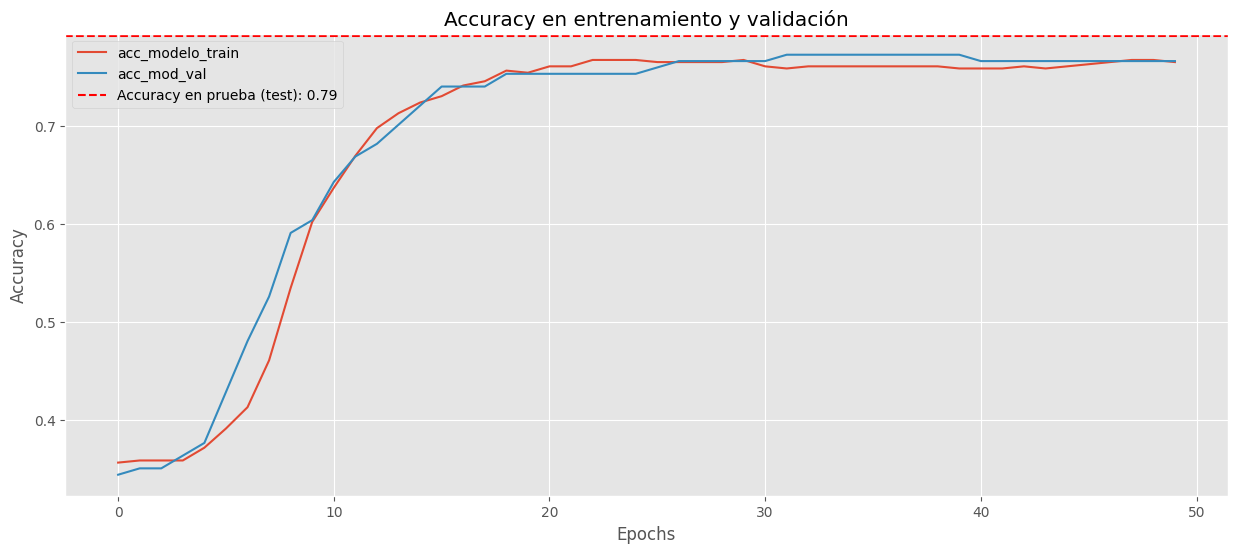

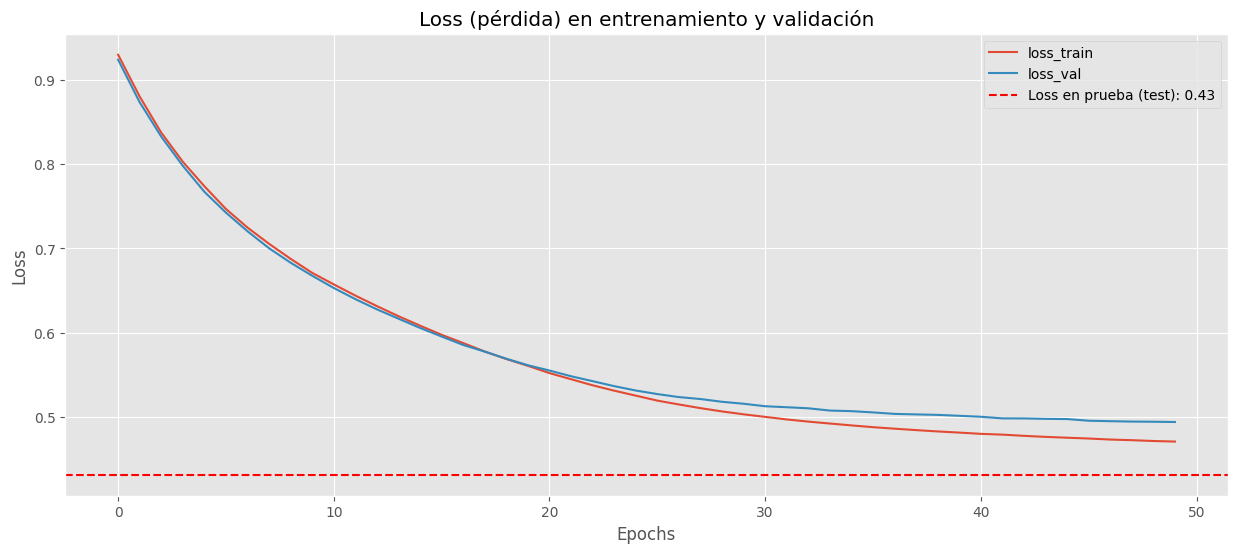

In [52]:
# Gráfica del accuracy del modelo en train y test
loss_test, acc_test = model.evaluate(X_test_s, y_test, verbose=0)
plt.plot(history.history['accuracy'], label = "acc_modelo_train")
plt.plot(history.history['val_accuracy'], label = "acc_mod_val")
plt.axhline(y=acc_test, color='r', linestyle='--', label=f"Accuracy en prueba (test): {acc_test:.2f}")
plt.title("Accuracy en entrenamiento y validación")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Gráfica de la pérdida en test y train
plt.plot(history.history['loss'], label = "loss_train")
plt.plot(history.history['val_loss'], label = "loss_val")
plt.axhline(y=loss_test, color='r', linestyle='--', label=f"Loss en prueba (test): {loss_test:.2f}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss (pérdida) en entrenamiento y validación")
plt.legend()
plt.show()

***Interpretación:***

- En la gráfica del *Accuracy* se busca que a medida que evolucionen en las *epoch* se incremente este valor tanto en entrenamiento como en prueba. Un valor alto en entrenamiento y bajo en prueba indica posible *overfitting*.

- En la gráfica de la *pérdida* se busca que ambas gráficas sean decrecientes, lo que indicaria que a medida que se avanzan en las *epoch* se va minimizando la función *loss*.



Para hacer algunas predicciones y revisar la matriz de confusión podemos utilizar lo siguiente.

In [53]:
predict = model.predict(X_test_s)
print(predict[0:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.4593357 ]
 [0.6548448 ]
 [0.71292216]
 [0.17647332]
 [0.38522467]
 [0.33664486]
 [0.55024904]
 [0.88305235]
 [0.03961065]
 [0.7003616 ]]


Calculamos las clases de acuerdo con las probabilidades y un umbral de 0.5

In [54]:
y_predict = np.where(model.predict(X_test_s) > 0.5, 1, 0)
y_predict[0:10]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.73      0.55      0.63        49

    accuracy                           0.79       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.79      0.78       154



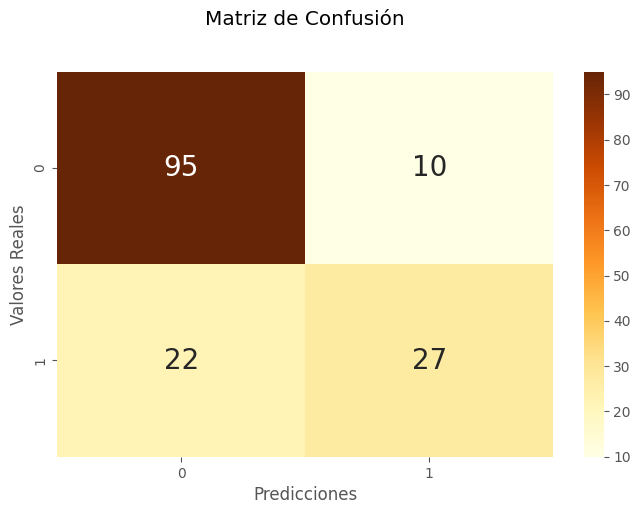

In [55]:
plt.rcParams['figure.figsize'] = (8, 5)
from sklearn import metrics
cm = confusion_matrix(y_test, y_predict)
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                       # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

print(classification_report(y_test, y_predict))

# <FONT SIZE=5 COLOR="purple"> Ejemplo de Clasificación </FONT>

En este punto vamos a recordar como entrenar una red neuronal y las librerías que debemos usar.

Primero, revisaremos un poco sobre análisis exploratorio de los datos, luego entrenaremos el perceptrón multicapa y finalmente entrenaremos la red usando *keras* y *tensorflow*.

## <FONT SIZE=4 COLOR="blue"> 3.1 Contexto del problema </FONT>

Vamos a considerar un conjunto de datos de *kaggle* que se pueden encontrar en este link:  [DATOS 📰](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

**Acerca del conjunto de datos**

Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen.

<br>
<center><img src="https://healthdataminer.com/wp-content/uploads/2019/11/celulas-palomas.png?raw=true" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: https://healthdataminer.com/analitica-en-accion/modelos-no-supervisados-en-salud-clusterizando-celulas/ </FONT> <figcaption></center>

En el espacio tridimensional es el descrito en: [KP Bennett y OL Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Información de atributos:

1) Número de identificación

2) Diagnóstico (M = maligno, B = benigno)

3-32). Se calculan diez características de valor real para cada núcleo celular:

   - a) radio (media de las distancias desde el centro a los puntos del perímetro)
   - b) textura (desviación estándar de los valores de la escala de grises)
   - c) perímetro
   - d) área
   - e) uniformidad (variación local en las longitudes del radio)
   - f) compacidad (perímetro^2 / área - 1.0)
   - g) concavidad (severidad de las porciones cóncavas del contorno)
   - h) puntos cóncavos (número de porciones cóncavas del contorno)
   - i) simetría
   - j) dimensión fractal ("aproximación de la línea de costa" - 1)

La media, el error estándar y el "peor" o mayor (media de los tres
valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es *Mean Radius*, el campo 13 es *Radius SE*, el campo 23 es *Worst Radius*.

- Todos los valores de características se recodifican con cuatro dígitos significativos.

- Faltan valores de atributo: ninguno

- Distribución de clases: 357 benignos, 212 malignos

**Objetivo del ejercicio:** Determinar si una mujer tiene un diagnóstico de tumor maligno o benigno de acuerdo con una serie de valores de las características presentes en las imágenes celulares.


## <FONT SIZE=4 COLOR="blue"> 3.2 Importar los datos </FONT>

Vamos a traer los datos del GitHub

```python
url ="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/cancer_clasificacion.csv"
```






In [ ]:
url ="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/cancer_clasificacion.csv"

In [ ]:
# importar los datos
cancer = pd.read_csv(url, sep = ";")
cancer.head()

# <FONT SIZE=5 COLOR="purple"> Ejercicio </FONT>

Utilizar los conceptos de este cuaderno para el siguiente problema de clasificación con:

- Perceptrón
- MLP
- ANN con *tensorflow.keras*

Considere como variable objetivo: *type*

In [56]:
url2 ="https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/winequality.csv"

In [57]:
df = pd.read_csv(url2).dropna()
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
